<a href="https://colab.research.google.com/github/joaomerjam/ECON3916-33674-Statistical-Machine-Learning/blob/main/Lab%202/V1%20Lab%202%3A%20Fred%20Api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fredapi

In [2]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Authenticate
# Replace the string below with YOUR unique API key from fred.stlouisfed.org
fred = Fred(api_key='')

In [4]:
# 1. Ftech the data series
print("Fteching data from FED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head()) # if you want to see more of the rows just add the number of rows you want to see in the purple ()
print(df.tail())


Fteching data from FED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [16]:
def get_real_wage(nominal_col, cpi_col):

  """
  Takes a nominal colum and a CPI column.
  Returns a new column adjusted for inflation (Real Dolars)
  """
  # 1 get the CPI of the most recent date
  # then .iloc[-1] grabs the very last row in the data

  cpi_today = cpi_col.iloc[-1]

    #2 the formula: (Nominal/old_CPI) * CPI_today
  real_col = (nominal_col / cpi_col) * cpi_today

  return real_col

#apply the function to create a new column
# feed the machine our two columns:
df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# see Real Wages are different from Nominal!
print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


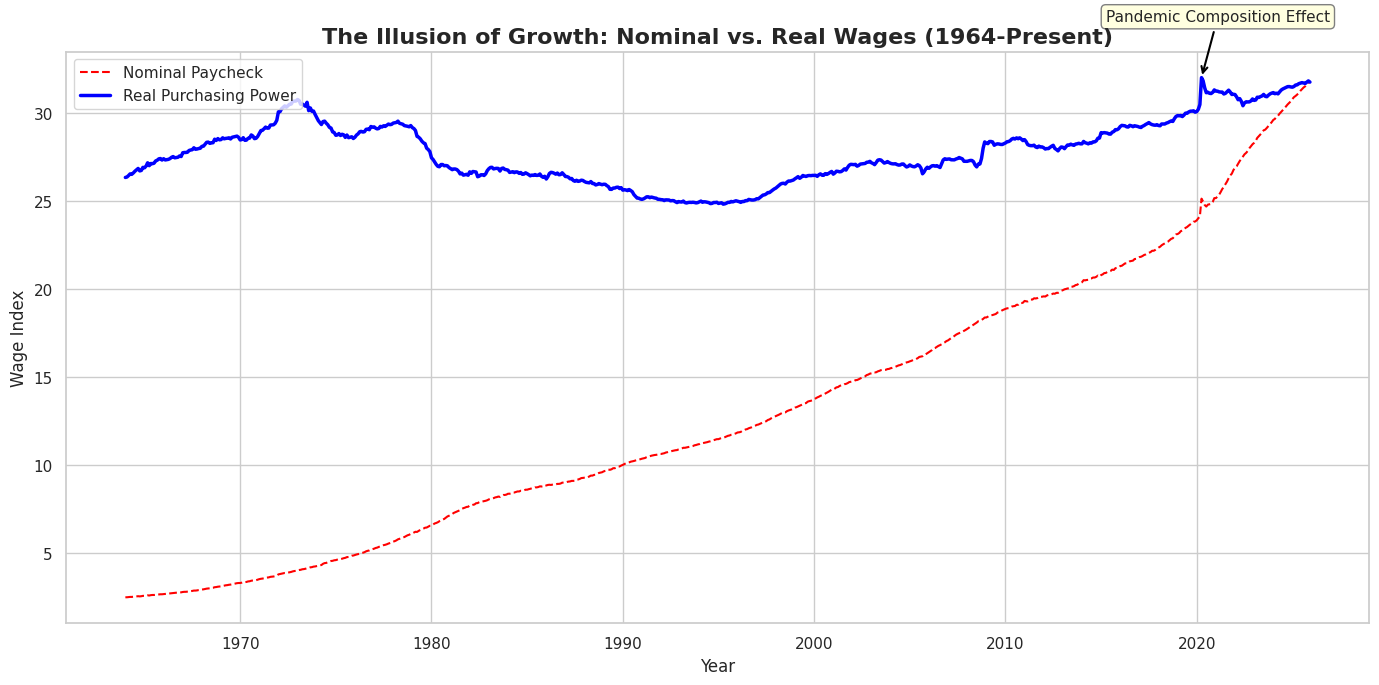

In [17]:
# AI generation Test
"""
prompt: "I have a Python pandas DataFrame named 'df' with a DatetimeIndex.
It contains two columns: 'Nominal_Wage' and 'Real_Wage'.

Please write Python code using Matplotlib and Seaborn to create a professional economic time-series chart.

Requirements:
1. Plot both lines on the same chart.
2. Style 'Nominal_Wage' as a dashed red line (label: 'Nominal Paycheck').
3. Style 'Real_Wage' as a thick blue line (label: 'Real Purchasing Power').
4. Add a title: 'The Illusion of Growth: Nominal vs. Real Wages (1964-Present)'.
5. Important: Add an annotation arrow pointing to the 2020 spike in Real Wages with the text: 'Pandemic Composition Effect'.
6. Use a whitegrid theme and make the figure size large (14, 7).

Do not generate sample data; assume 'df' already exists."
"""
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(df.index, df['Nominal_Wage'], linestyle='--', color='red', label='Nominal Paycheck')
ax.plot(df.index, df['Real_Wage'], linestyle='-', color='blue', linewidth=2.5, label='Real Purchasing Power')

ax.set_title("The Illusion of Growth: Nominal vs. Real Wages (1964-Present)", fontsize=16, fontweight='bold')
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Wage Index", fontsize=12)

# Annotation for 2020 pandemic spike
spike_date = df.loc['2020'].idxmax()['Real_Wage'] if hasattr(df.loc['2020'].idxmax(), '__getitem__') else df.loc['2020', 'Real_Wage'].idxmax()
spike_value = df.loc['2020', 'Real_Wage'].max()

ax.annotate(
    'Pandemic Composition Effect',
    xy=(spike_date, spike_value),
    xytext=(spike_date - pd.DateOffset(years=5), spike_value * 1.1),
    fontsize=11,
    arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', edgecolor='gray')
)

ax.legend(loc='upper left', fontsize=11)
plt.tight_layout()
plt.show()

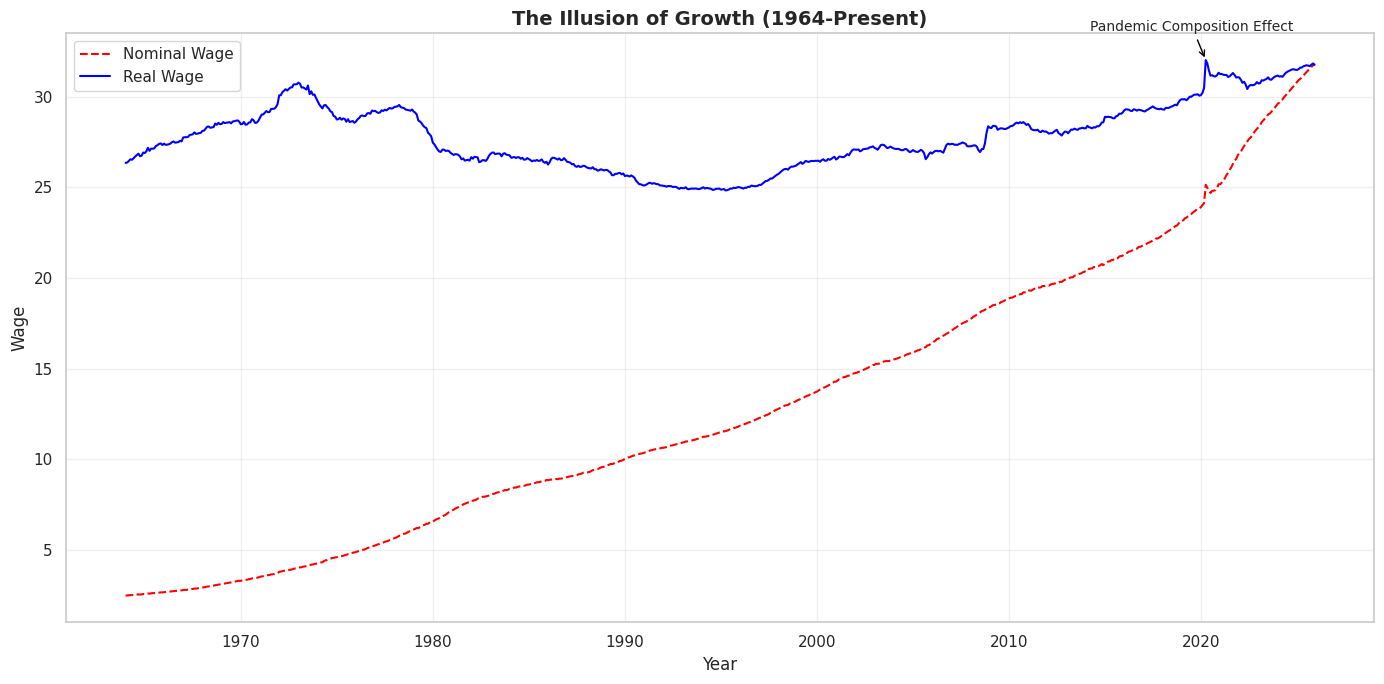

In [18]:
# AI test 2
"""
Prompt: "I have a DataFrame 'df' with 'Nominal_Wage' and 'Real_Wage'.
Please write Python code using Matplotlib to plot both on one large chart (14, 7).
1. Style 'Nominal_Wage' as a dashed red line.
2. Style 'Real_Wage' as a solid blue line.
3. Add a title: 'The Illusion of Growth (1964-Present)'.
4. Annotate the 2020 spike with the text 'Pandemic Composition Effect'."
"""
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(df.index, df['Nominal_Wage'], linestyle='--', color='red', label='Nominal Wage')
ax.plot(df.index, df['Real_Wage'], linestyle='-', color='blue', label='Real Wage')

ax.set_title("The Illusion of Growth (1964-Present)", fontsize=14, fontweight='bold')
ax.set_xlabel("Year")
ax.set_ylabel("Wage")
ax.legend()
ax.grid(True, alpha=0.3)

# Annotate 2020 spike
spike_date = pd.Timestamp('2020-04-01')
spike_value = df.loc['2020', 'Real_Wage'].max()

ax.annotate(
    'Pandemic Composition Effect',
    xy=(spike_date, spike_value),
    xytext=(spike_date - pd.DateOffset(years=6), spike_value * 1.05),
    fontsize=10,
    arrowprops=dict(arrowstyle='->', color='black')
)

plt.tight_layout()
plt.show()

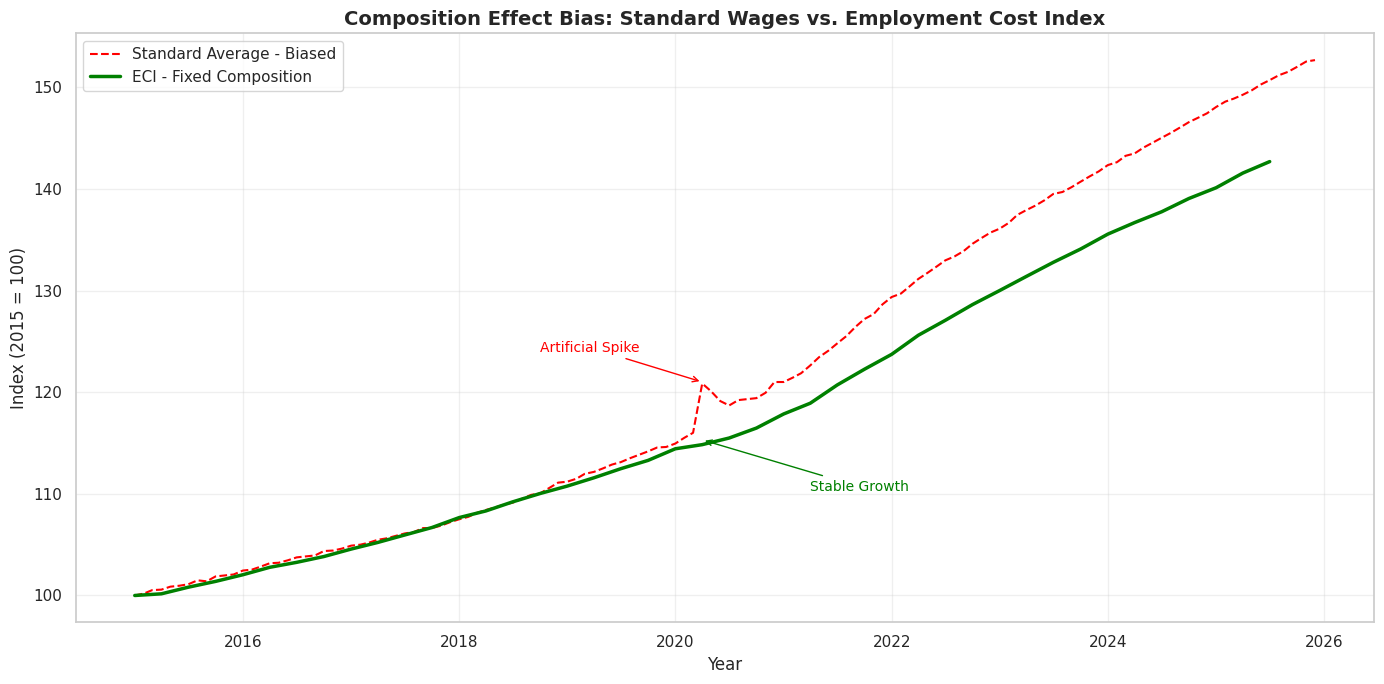

In [19]:
# another AI test: import matplotlib.pyplot as plt
import pandas as pd

# Fetch Employment Cost Index
eciwag = fred.get_series('ECIWAG')

# Filter both series from 2015 onwards
start_date = '2015-01-01'
wages_filtered = wages[wages.index >= start_date]
eciwag_filtered = eciwag[eciwag.index >= start_date]

# Rebase both to 100 (first value = 100)
wages_rebased = (wages_filtered / wages_filtered.iloc[0]) * 100
eciwag_rebased = (eciwag_filtered / eciwag_filtered.iloc[0]) * 100

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(wages_rebased.index, wages_rebased, linestyle='--', color='red', label='Standard Average - Biased')
ax.plot(eciwag_rebased.index, eciwag_rebased, linestyle='-', color='green', linewidth=2.5, label='ECI - Fixed Composition')

ax.set_title("Composition Effect Bias: Standard Wages vs. Employment Cost Index", fontsize=14, fontweight='bold')
ax.set_xlabel("Year")
ax.set_ylabel("Index (2015 = 100)")
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

# Annotate the 2020 divergence - Artificial Spike
spike_date = pd.Timestamp('2020-04-01')
spike_value = wages_rebased.loc['2020'].max()

ax.annotate(
    'Artificial Spike',
    xy=(spike_date, spike_value),
    xytext=(spike_date - pd.DateOffset(months=18), spike_value + 3),
    fontsize=10,
    color='red',
    arrowprops=dict(arrowstyle='->', color='red')
)

# Annotate the ECI stable growth
eci_2020_value = eciwag_rebased.loc['2020'].mean()

ax.annotate(
    'Stable Growth',
    xy=(spike_date, eci_2020_value),
    xytext=(spike_date + pd.DateOffset(months=12), eci_2020_value - 5),
    fontsize=10,
    color='green',
    arrowprops=dict(arrowstyle='->', color='green')
)

plt.tight_layout()
plt.show()